# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [107]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('/Users/ViniciusPantoja/Dropbox/MOOC/Udacity/machine-learning/projects/boston_housing/housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [108]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price =np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)



Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **  The price of the room will probably increase with the average number of rooms ('RM'). 

Regarding its relation with 'LSTAT', probably will decrease, not because of the neighbor class, but because of the quality of the apartment that probably can be afforded by this social class. 

At last, 'PTRATIO' probably is negative correlated with the price. The reason for this is that places where this ratio is lower are more demanded because they lead to better education for the children of the buyer (teachers can pay more attention to students in classes with lower number of students).

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [109]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)

    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [110]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** Yes, I believe that the model have captured the variance of the data, although it has a low number of points. The high R2 is misleading due to the number of observations. 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [116]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split as tts
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = tts(features, prices, test_size = 0.2, random_state = 42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** Setting aside a chunck of the data is important to better evaluate your model. If you use the hole data as training data might improve the result of a given model, but you will not have idea how it will perform when new data arrives. By separating a part of your data, you can train your model in a smaller data (train data) and evaluate the performance of the model on your test data. By evaluating it you have a chance to improve it if it is needed, and also evaluate the changes that you make on your model. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

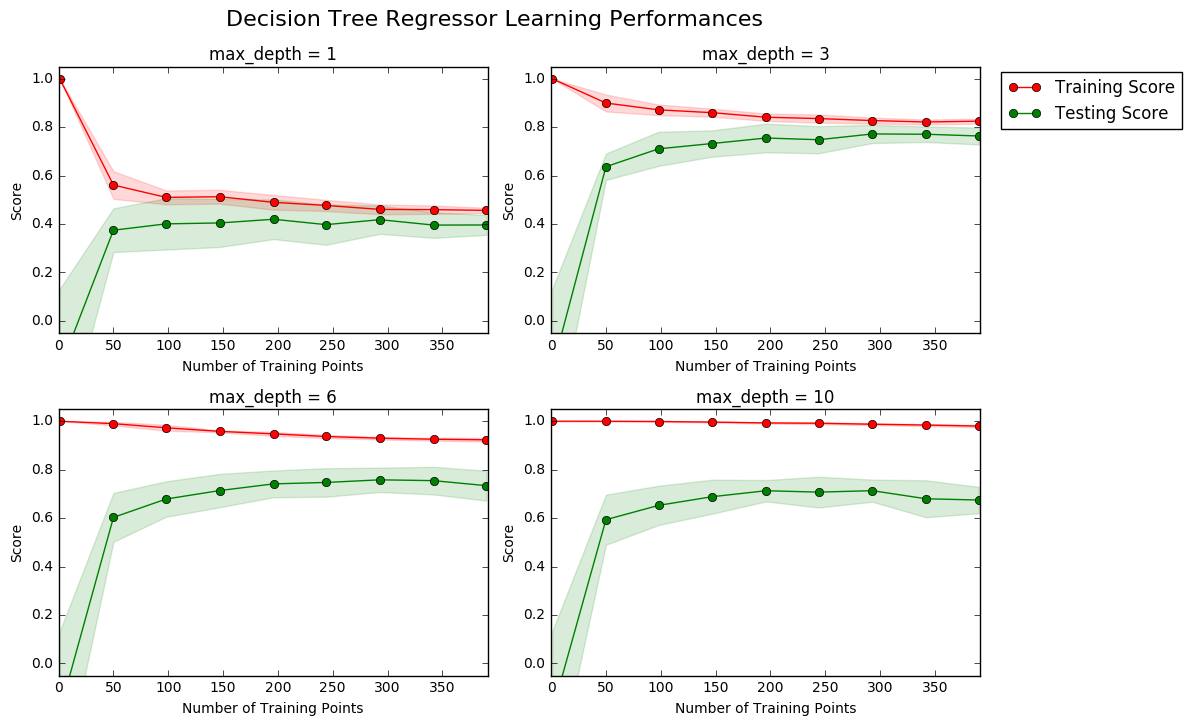

In [119]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: ** The max_depth parameter sets the number of decision steps that you will use to construct your model. If it is too large, your model will probably overfit. 

I'll choose the max_depth = 3 Because is the model with the bes balance of test score x (test score / training score). 

Increasing the number of training points would lead to a decrease of the training score, because the model generated would have to correctely label more training points, what is harder than with few points (look at the score when the x axis is near zero).

After 200 training points, the score of the testing curve would remain the same (or a very small increase). In this case it is better not to increase the number of training points, because your model is already explaining the data well and it would only consume more memory and time. 

If you want to increase your scoring, you should improve your model, and not look for more training data. 

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

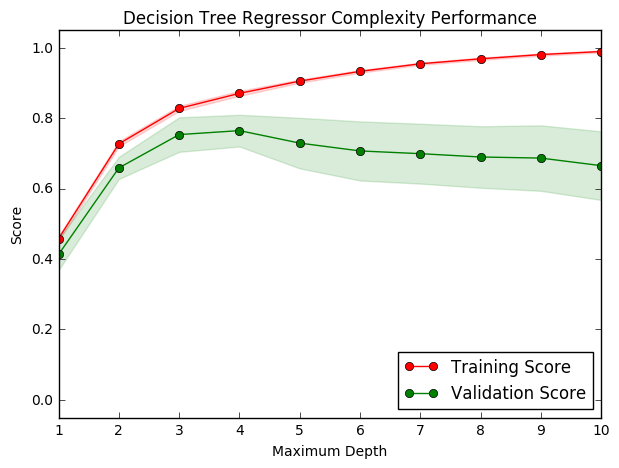

In [120]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: ** The score function for a maximum depth of 1 is low, because it suffers of a high bias. A simple model such as the one with a maximum depth of 1 is not able to capture the true value of the observations. 

It does not suffer from a high variance, because the training and validation curves are near each other. This means that the performance of the model generated with the training is the same on the training data and the test data (both terrible). 

As we increase the depth of our model, it starts to generalize better and the validation score increases, attaining its maximum between 3 or 4 depth size. After that the model gets too specific, and overfits the training data. This means that the score of the model when looking at the training data is almos perfect, but when we test on new data it has a terrible performance. This means that our model suffers from a hight variance. 

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** Using both plots is clear that the optimal number of depth would be three or four, because of the reasons previously mentioned. Now, the choice between 3 or 4 is a little subtle. Depth 3 have a slight better performance, but it suffers from a higher variance than the model with depth equals 3. 

I would choose the depth equals 3 because the improvement of the score of the model with 4 depth size is very low, compared with the variance it generates. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** The grid search technique is used to optimize models' hyperparameters. The idea is to look different settings of the model, and choose the best one according some score metric (R2, AUC, ROC, etc). 

The method consists of choosing a range of possible values for each hyperparameter and training and testing the model for each one. In our case, we have developed a grid from 1 to 10  the random forest model's maximum depth.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: ** K-fold Cross Validation training technique consists in deviding the training set in K chuncks of equal size, separate one, train your model in the other K-1 chunks and validade on the separated chunk. THen you separate the next chunk, adds back the first chink separated and train again your model in this new training set, and test it in the second separated chunck. Repeates this process K times. 

The good thing about this technique is that you can use your hole data as training and testing set. THis allows spaace for using different settings of your model (grid search technique). If you do not use the K-fold method or the separate test data method, you will probably overfit every model constructed by grid search techinique.



### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [126]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data

    cv_sets = ShuffleSplit(n_splits=10, test_size=.2, random_state=0)
    
    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [127]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: ** The answer here determines the value 4 as the optimal depth parameter. My answer was 3 as the optimal number. I maintain my choice because I give a high penalty for variace on the model, and I do not know how this optimum was calculated. If it uses only the score value to make its decision, probably we could construct a better optimizer that penalizes variance.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [128]:
X_train.shape

(391, 3)

In [132]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
    

# TODO: Minimum price of the data
minimum_price = np.min(prices)
minimum_RM = np.min(features['RM'])
minimum_LS = np.min(features['LSTAT'])
minimum_PR = np.min(features['PTRATIO'])

# TODO: Maximum price of the data
maximum_price = np.max(prices)
maximum_RM = np.max(features['RM'])
maximum_LS = np.max(features['LSTAT'])
maximum_PR = np.max(features['PTRATIO'])

# TODO: Mean price of the data
mean_price =np.mean(prices)
mean_RM =np.mean(features['RM'])
mean_LS =np.mean(features['LSTAT'])
mean_PR =np.mean(features['PTRATIO'])

# TODO: Median price of the data
median_price = np.median(prices)
median_RM = np.median(features['RM'])
median_LS = np.median(features['LSTAT'])
median_PR = np.median(features['PTRATIO'])


# TODO: Standard deviation of prices of the data
std_price = np.std(prices)
std_RM = np.std(features['RM'])
std_LS = np.std(features['LSTAT'])
std_PR = np.std(features['PTRATIO'])

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)
print ""
print '#############################################################'
print ''

print "Statistics for Boston housing dataset:\n"
print "Minimum RM: {:,.2f}".format(minimum_RM)
print "Maximum RM: {:,.2f}".format(maximum_RM)
print "Mean RM: {:,.2f}".format(mean_RM)
print "Median RM {:,.2f}".format(median_RM)
print "Standard deviation of RM: {:,.2f}".format(std_RM)
print ""
print '#############################################################'
print ''

print "Statistics for Boston housing dataset:\n"
print "Minimum LS: {:,.2f}".format(minimum_LS)
print "Maximum LS: {:,.2f}".format(maximum_LS)
print "Mean LS: {:,.2f}".format(mean_LS)
print "Median LS {:,.2f}".format(median_LS)
print "Standard deviation of LS: {:,.2f}".format(std_LS)
print ""
print '#############################################################'
print ''

print "Statistics for Boston housing dataset:\n"
print "Minimum PR: {:,.2f}".format(minimum_PR)
print "Maximum PR: {:,.2f}".format(maximum_PR)
print "Mean PR: {:,.2f}".format(mean_PR)
print "Median PR {:,.2f}".format(median_PR)
print "Standard deviation of PR: {:,.2f}".format(std_PR)
print ""
print '#############################################################'
print ''

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36
Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13

#############################################################

Statistics for Boston housing dataset:

Minimum RM: 3.56
Maximum RM: 8.40
Mean RM: 6.24
Median RM 6.18
Standard deviation of RM: 0.64

#############################################################

Statistics for Boston housing dataset:

Minimum LS: 1.98
Maximum LS: 37.97
Mean LS: 12.94
Median LS 11.69
Standard deviation of LS: 7.07

#############################################################

Statistics for Boston housing dataset:

Minimum PR: 12.60
Maximum PR: 22.00
Mean PR: 18.52
Median PR 19.10
Standard deviation of PR: 2.11

########################################

**Answer: **

To answer properly this question I had to add more descriptive statistics. This is needed to properly assess the new data. 

The first client has a house with 5 bedrooms, while the average of bedrooms in our database is 6.24 it is not only lower than the average, but also lower than one standar deviation below the average. Looking only to this variable, the house price would be lower than the average price of our database. Looking at the second variable, the level of poverty in the neighborhood, the client 1 has score of 17%. The average is almost 13%, a number lower than the client's number. But this variable is within one standard deviation distance of the average. This means that, looking at this cariable, the price should be lower than the average of the database. Finally the third variable present better result than the average. The teacher student rate is 15 to 1 while the average in our database is 15.5 to 1. This variable is also below than one standar deviation of the average. This variable should pull the price up for this client. 

Our prediction for this house is US$ 403 thousand dollars. This number is a little lower than the average price in our database and above the average less one standard deviation. In my opinion our model makes a good prediction, based on the analysis of each variable presented above. 

For the next two houses I'll be more direct. 

the second house presents the three variables near the worst limits, and a lot of standard deviations far from the average. Its price must be near the minimum price in our database. Our model predicts the price of this house above the minimum but within one standard deviation from it. The prediction appears to be a little above what it should be, but it we need more analysis to state that. 

The third house is the best one. All the variables are near the best houses in each feature. It's price should be close to the maximum price in our database. Our model reachs a final price close to the maximum price, and well above the maximum minus one standard deviation. In my opinion the model presents a very good performance. 

In general, the model apperas to present a very good performance. I would put it to production. 



### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [133]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: ** The data collected in 1978 is not representative of today's housing data. The style of living changed a lot. For example, During the 90's and 00's the demand for houses with integrated dinner rooms and kitchens has increased a lot because hiring help in the kitchen became very expensive. Nowadays, people cook and interact with people in the living room. 

The features in our data is not sufficient to train a reality ready model. Features like garage, hight, view, parks near, subway or bus stop near, etc are important to precify one house. 

For what we have seen, our model presents a good performance for the data that we have. It can improve, with the points presented above, but we have a very good model among the models that we can train with our data.

Rural data is very different from city data, it cannot be used to predict prices in rural era. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.